In [1]:
import numpy as np
import pandas as po
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
from filepaths import fp

In [4]:
df = po.read_csv(fp.raw_data).drop('CONS_NO', axis=1)
df

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.12,9.96,16.92,7.60,27.160942,18.05,26.47,18.750000,17.84,14.92
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
2,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
3,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.50,9.99,11.78,18.59,26.800000,18.57,14.59,12.820000,19.37,15.92
4,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,...,17.77,10.37,15.32,13.51,12.230000,14.68,16.35,18.140000,18.41,17.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.25,3.56,3.38,4.39,3.720000,3.77,3.96,3.640000,3.40,4.38
42368,0,2.70,4.39,3.95,0.00,0.00,0.00,0.00,0.00,0.00,...,4.81,4.87,4.48,3.67,3.310000,4.58,3.33,3.190000,4.57,4.00
42369,0,0.58,0.84,1.61,0.90,0.60,0.82,0.89,0.03,0.73,...,0.33,0.66,2.92,2.36,3.860000,4.28,3.37,5.085875,2.44,1.15
42370,0,16.89,13.84,13.50,14.60,14.46,12.34,15.37,17.01,13.46,...,21.13,13.75,22.61,18.83,25.520000,18.11,19.31,17.480000,17.20,15.28


In [5]:
flag_col = df['FLAG']

In [6]:
df = df.drop('FLAG', axis=1)

In [7]:
df = (df - df.mean())/df.std()

In [8]:
df['FLAG'] = flag_col

In [9]:
df_0 = df[df['FLAG'] == 0].drop('FLAG', axis=1).reset_index(drop=True) # Normal user
df_1 = df[df['FLAG'] == 1].drop('FLAG', axis=1).reset_index(drop=True) # Abnormal user (energy thief)

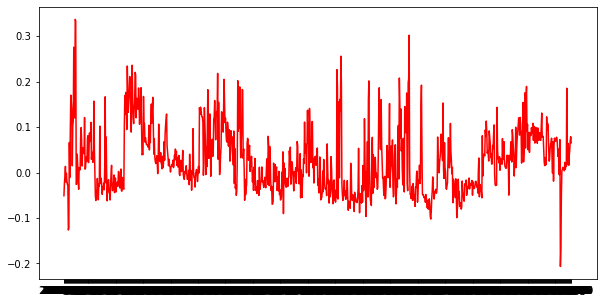

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df_1.iloc[4], color='red')
#2014/1/1      2.90

In [13]:
cos_sim = cosine_similarity(df_0.to_numpy(), df_1.to_numpy())

In [14]:
np.argmax(cos_sim[:, 4])

17753

In [25]:
df.columns

Index(['2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12', '2014/1/13',
       '2014/1/14', '2014/1/15', '2014/1/16', '2014/1/17', '2014/1/18',
       ...
       '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4', '2016/9/5',
       '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9', 'FLAG'],
      dtype='object', length=1035)

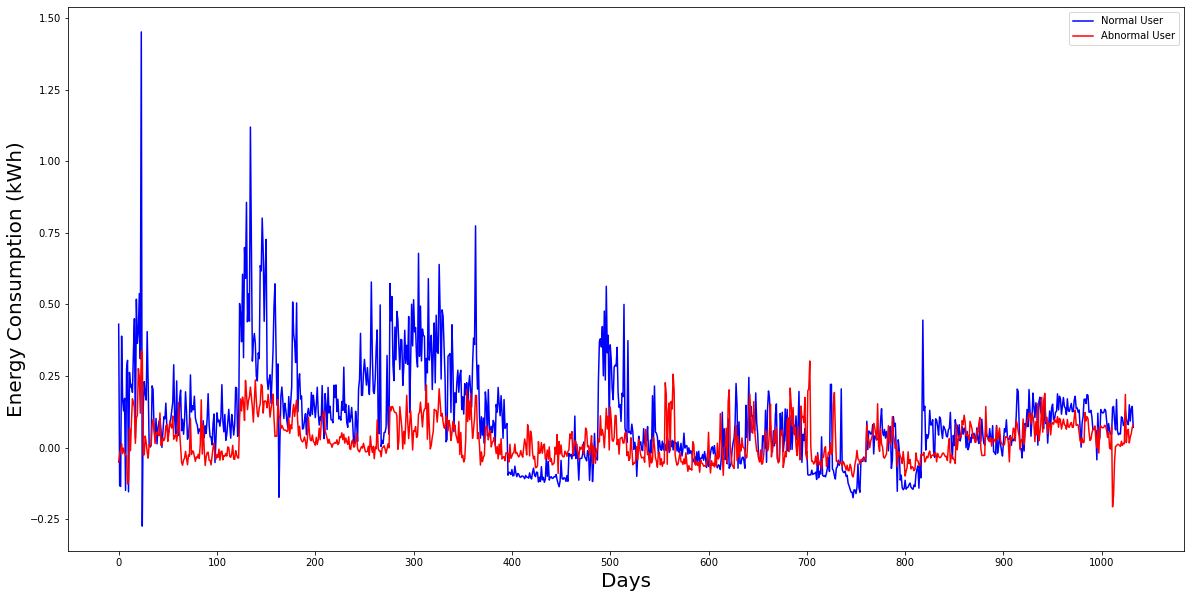

In [35]:
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[17753][:-1], color='blue')
plt.plot(df_1.iloc[4][:-1], color='red')
plt.xticks(range(0, len(df_1.iloc[4][:-1]), 100), range(0, len(df_1.iloc[4][:-1]), 100)) 
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Normal User', 'Abnormal User'])
plt.savefig('plots/data_analysis/1.csv')